In [1]:
import sys

import matplotlib.pyplot as plt
import torch
from iopath.common.file_io import PathManager
from iopath.fb.manifold import ManifoldPathHandler


sys.path.insert(0, "fbcode/ar_sharing/body_tracking_3d/models/hmr/")

pathmgr = PathManager()
pathmgr.register_handler(ManifoldPathHandler(), allow_override=True)

%load_ext autoreload
%autoreload 2

I0912 015905.300 _utils_internal.py:179] NCCL_DEBUG env var is set to None


I0912 015905.301 _utils_internal.py:188] NCCL_DEBUG is INFO from /etc/nccl.conf


In [2]:
import src
from src.utils.plot_utils_experiment_check import plot_shape_pose_norm, plot_mpjpes_and_accel, plot_mpjpes, plot_heatmap

In [3]:
### fix cons==0.5, f30
exp_names = {}
weights = [0., 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1, 3, 10, 30, 100, 300]
for shape_weight in weights:
    for pose_weight in weights:
        exp_name = f"seq_optim_grid_shape_pose/grid__shape_{shape_weight}_pose_{pose_weight}_f30"
        exp_names[r"$\beta$" + f"{shape_weight} j3d {pose_weight}"] = exp_name

# for i in exp_names.items():
#     print(i)

In [4]:
import numpy as np
# weights = [1e-3, 1e-2, 1e-1, 3e-1, 1, 3, 10, 30, 100, 300]
weights = [0., 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1, 3, 10, 30, 100, 300]
shape_pose_grid_accel = np.zeros((len(weights),len(weights)))
shape_pose_grid_mpjpe = np.zeros((len(weights),len(weights)))

for i, shape_weight in enumerate(weights):
    for j, pose_weight in enumerate(weights):
        if shape_weight == 0 and pose_weight == 0:
            shape_pose_grid_mpjpe[i,j] = 57.4
            shape_pose_grid_accel[i,j] = 16.5
            continue

        exp_name = f"grid__shape_{shape_weight}_pose_{pose_weight}_f30"
        common_metrics_path = f"manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/{exp_name}/metrics"
        
        try:
            pa_mpjpe_path = pathmgr.get_local_path(f"{common_metrics_path}/pa_mpjpe_vs_gt_valid.pth")
            pa_mpjpe = np.array(torch.load(pa_mpjpe_path, map_location='cpu')['prev_vals'])
            shape_pose_grid_mpjpe[i,j] = pa_mpjpe[-1]

            accel_error_path = pathmgr.get_local_path(f"{common_metrics_path}/accel_err_vs_gt_valid.pth")
            accel_error = np.array(torch.load(accel_error_path, map_location='cpu')['prev_vals'])
            shape_pose_grid_accel[i,j] = accel_error[-1]
        except OSError:
            print(shape_weight, pose_weight)
            continue # file is not saved yet        

I0912 015914.759 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015915.450 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015915.453 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015915.926 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015915.928 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015916.344 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015916.346 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015916.767 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015916.768 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015917.195 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015917.198 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015917.634 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015917.636 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015918.077 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015918.080 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015918.506 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015918.509 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015918.950 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015918.953 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015919.396 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015919.399 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015919.836 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015919.838 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015920.271 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015920.274 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015920.721 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015920.724 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015921.162 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015921.164 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015921.585 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015921.588 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015922.035 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015922.037 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015922.466 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015922.469 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015922.912 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015922.915 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015923.363 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015923.366 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015923.799 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015923.807 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015924.268 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015924.271 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015924.686 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015924.690 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015925.104 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015925.107 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015925.521 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.0_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015925.523 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015925.936 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015925.938 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015926.160 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015926.162 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015926.616 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015926.618 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015927.053 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015927.056 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015927.279 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015927.293 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015927.749 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015927.753 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015928.182 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015928.184 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015928.588 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015928.591 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015929.002 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015929.005 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015929.501 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015929.504 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015929.931 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015929.933 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015930.361 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015930.363 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015930.778 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015930.780 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015930.990 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015930.993 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015931.408 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015931.411 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015931.854 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015931.858 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015932.080 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015932.084 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015932.308 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015932.317 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015932.740 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015932.743 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015933.189 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015933.192 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015933.616 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015933.619 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015934.032 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015934.034 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015934.519 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015934.521 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015934.991 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015934.993 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015935.427 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015935.429 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015935.660 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015935.663 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015936.137 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015936.140 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015936.358 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015936.361 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015936.786 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015936.789 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015937.265 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015937.267 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015937.674 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015937.677 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015937.882 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015937.885 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015938.309 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015938.312 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015938.734 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015938.737 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015938.969 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015938.971 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015939.397 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015939.400 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015939.622 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015939.625 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015940.068 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015940.071 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015940.597 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015940.600 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015940.808 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015940.813 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015941.228 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015941.231 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015941.672 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015941.674 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015941.886 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015941.889 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015942.116 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015942.119 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015942.552 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015942.555 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015942.769 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015942.772 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015942.999 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015943.002 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015943.217 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015943.220 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015943.636 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015943.639 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015943.853 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015943.855 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015944.277 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015944.280 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015944.499 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.003_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015944.502 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015944.719 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015944.724 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015945.162 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015945.165 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015945.416 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015945.418 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015945.633 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015945.636 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015946.044 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015946.047 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015946.269 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015946.272 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015946.513 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015946.515 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015946.723 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015946.725 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015946.946 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015946.948 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015947.176 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015947.179 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015947.391 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015947.393 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015947.800 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015947.803 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015948.071 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015948.073 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015948.538 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015948.541 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015948.782 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015948.785 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015949.003 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015949.006 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015949.488 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015949.491 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015949.907 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015949.910 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015950.118 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015950.120 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015950.351 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015950.354 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015950.764 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015950.767 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015950.989 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015950.992 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015951.217 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015951.219 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015951.642 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015951.645 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015952.064 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015952.067 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015952.495 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015952.498 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015952.971 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015952.973 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015953.473 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015953.475 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015953.682 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015953.684 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015954.129 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015954.136 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015954.544 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015954.548 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015954.825 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015954.828 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015955.030 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015955.033 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015955.252 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015955.256 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015955.681 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015955.684 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015955.923 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015955.925 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015956.191 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015956.193 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015956.471 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015956.474 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015957.053 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015957.055 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015957.271 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015957.274 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015957.709 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015957.711 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015957.918 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015957.921 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015958.138 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015958.140 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015958.347 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015958.350 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015958.770 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015958.774 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015959.003 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015959.006 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 015959.449 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 015959.452 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 015959.676 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 015959.679 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020000.123 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020000.125 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020000.343 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020000.346 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020000.562 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020000.565 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020000.794 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.03_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020000.796 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020001.017 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020001.020 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020001.242 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020001.245 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020001.464 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020001.466 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020001.868 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020001.870 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020002.080 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020002.082 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020002.506 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020002.508 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020002.718 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020002.720 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020002.948 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020002.951 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020003.216 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020003.218 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020003.482 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020003.490 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020003.715 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020003.718 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020003.937 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020003.941 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020004.161 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020004.163 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020004.384 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020004.387 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020004.836 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020004.838 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020005.046 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020005.049 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020005.256 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020005.259 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020005.490 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020005.493 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020005.746 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020005.748 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020005.954 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020005.956 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020006.188 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020006.191 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020006.409 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020006.411 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020006.664 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020006.667 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020007.119 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020007.121 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020007.332 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020007.334 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020007.557 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020007.560 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020007.970 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020007.975 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020008.217 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020008.220 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020008.689 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020008.693 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020009.100 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020009.103 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020009.547 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020009.550 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020009.767 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020009.770 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020009.980 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020009.983 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020010.205 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020010.207 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020010.415 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020010.418 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020010.625 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020010.628 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020010.895 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020010.897 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020011.174 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020011.177 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020011.403 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020011.406 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020011.629 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020011.632 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020011.838 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020011.840 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020012.049 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020012.051 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020012.485 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020012.488 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020012.693 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020012.696 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020012.905 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020012.907 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020013.317 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020013.321 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020013.529 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020013.532 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020013.745 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020013.751 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020013.977 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020013.980 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020014.191 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020014.194 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020014.451 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020014.454 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020014.704 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020014.707 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020014.916 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020014.918 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020015.160 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020015.162 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020015.387 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020015.389 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020015.787 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020015.789 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020016.007 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020016.010 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020016.227 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020016.229 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020016.483 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020016.486 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020016.689 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020016.692 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020016.899 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020016.901 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020017.115 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020017.122 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020017.369 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020017.372 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020017.582 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020017.586 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020017.798 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020017.810 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020018.023 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020018.027 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020018.256 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020018.258 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020018.478 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020018.481 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020018.688 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020018.691 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020018.898 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020018.900 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020019.140 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020019.143 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020019.361 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020019.364 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020019.574 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020019.576 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020019.983 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020019.986 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020020.205 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020020.208 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020020.413 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020020.415 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020020.631 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020020.633 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020020.842 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020020.845 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020021.101 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020021.103 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020021.384 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020021.386 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020021.603 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020021.606 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020022.024 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020022.028 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020022.632 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020022.634 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020022.850 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020022.853 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020023.063 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020023.066 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020023.288 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020023.291 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020023.514 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020023.517 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020023.726 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020023.729 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020023.934 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020023.936 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020024.141 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020024.144 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020024.558 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020024.560 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020024.778 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020024.784 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020025.187 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020025.189 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020025.415 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020025.417 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020025.637 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020025.640 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020025.864 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020025.866 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020026.084 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020026.086 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020026.306 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020026.308 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020026.512 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020026.514 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020026.722 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020026.727 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020026.935 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020026.938 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020027.153 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020027.156 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020027.385 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020027.389 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020027.794 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020027.797 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020028.005 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020028.008 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020028.269 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020028.271 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020028.480 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020028.482 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020028.689 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020028.691 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020028.910 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020028.912 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020029.129 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020029.132 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020029.341 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020029.344 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020029.562 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020029.564 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020030.025 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020030.028 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020030.302 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020030.305 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020030.618 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020030.620 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020030.828 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020030.831 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020031.042 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020031.044 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020031.270 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020031.277 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020031.585 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020031.588 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020031.794 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020031.798 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020032.003 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020032.006 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020032.252 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020032.255 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020032.458 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020032.460 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020032.664 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020032.667 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020033.073 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020033.076 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020033.543 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020033.545 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020033.753 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020033.755 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020034.193 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020034.196 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020034.412 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020034.414 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020034.620 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020034.622 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020034.848 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020034.851 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020035.058 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020035.061 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020035.271 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020035.274 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020035.695 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020035.698 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020035.909 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020035.911 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020036.130 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020036.132 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020036.342 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020036.351 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020036.609 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020036.612 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020036.831 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020036.834 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020037.050 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020037.054 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020037.265 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020037.267 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020037.696 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020037.700 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020037.921 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020037.924 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020038.134 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020038.137 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020038.343 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020038.346 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020038.552 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020038.555 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020038.802 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020038.804 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020039.220 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020039.223 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020039.630 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020039.632 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020039.844 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020039.847 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020040.300 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020040.302 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020040.564 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020040.567 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020040.819 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020040.822 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020041.177 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020041.180 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020041.390 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020041.393 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020041.603 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020041.606 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020041.812 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020041.815 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020042.030 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020042.033 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020042.253 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020042.256 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020042.473 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020042.477 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020042.683 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020042.685 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020043.008 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020043.011 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020043.219 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020043.221 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020043.524 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020043.527 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020043.741 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020043.743 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020043.948 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020043.950 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020044.377 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020044.379 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020044.585 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020044.587 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020044.793 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020044.795 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020045.002 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020045.004 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020045.212 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020045.215 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020045.425 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020045.428 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020045.638 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020045.641 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020045.858 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020045.861 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020046.120 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020046.122 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020046.378 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020046.381 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020046.591 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020046.594 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020046.805 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020046.808 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020047.064 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020047.067 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020047.325 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020047.327 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020047.542 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020047.545 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020047.747 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020047.749 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020048.161 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.0_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020048.164 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020048.371 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.0_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020048.373 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020048.581 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020048.583 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020048.793 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020048.795 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020048.999 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.003_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020049.002 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020049.253 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.003_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020049.255 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020049.460 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020049.462 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020049.682 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020049.684 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020049.900 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.03_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020049.901 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020050.112 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.03_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020050.118 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020050.327 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020050.330 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020050.735 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020050.740 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020051.144 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020051.147 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020051.351 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020051.354 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020051.759 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020051.761 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020051.967 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020051.970 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020052.189 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020052.191 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020052.401 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020052.404 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020052.675 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020052.677 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020052.926 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020052.929 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020053.346 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020053.349 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020053.762 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020053.765 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020053.970 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020053.972 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020054.194 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/accel_err_vs_gt_valid.pth


I0912 020054.197 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0912 020054.406 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0912 020054.409 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/accel_err_vs_gt_valid.pth ...


I0912 020054.622 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/accel_err_vs_gt_valid.pth


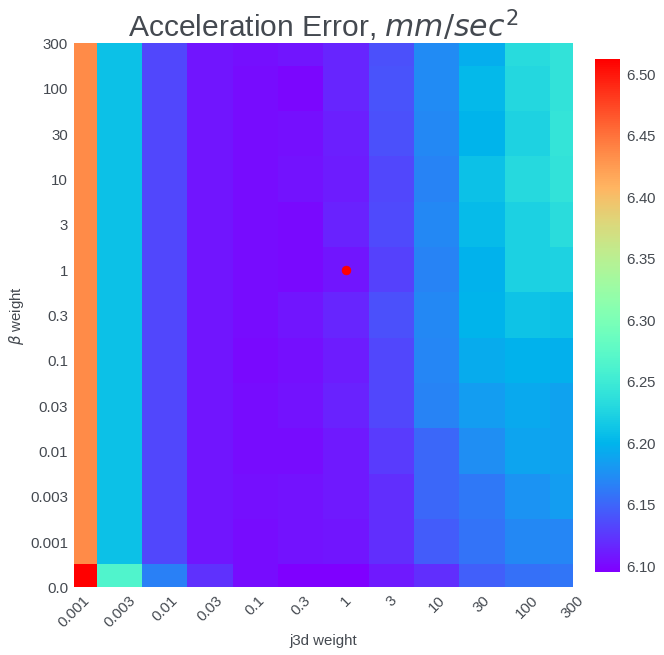

In [5]:
fig, ax = plot_heatmap(
    shape_pose_grid_accel[:, 1:],
    weights,
    weights[1:],
    r"$\beta$ weight",
    "j3d weight",
    title=r"Acceleration Error, $mm/sec^2$",
)
ax.scatter([6], [7], c="red", s=80)

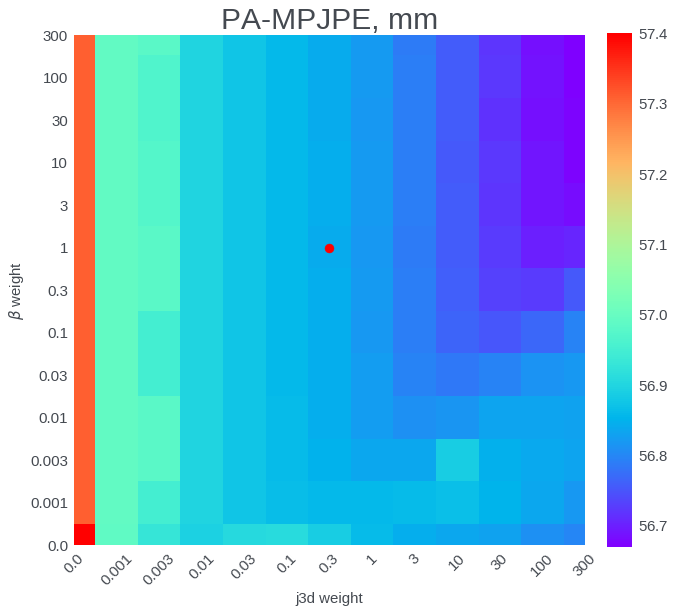

In [69]:
fig, ax = plot_heatmap(shape_pose_grid_mpjpe, weights, weights, r"$\beta$ weight", "j3d weight", title="PA-MPJPE, mm")
ax.scatter([6], [7], c='red', s=80)

I0906 051301.953 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051302.432 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051302.436 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051302.901 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051302.909 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051303.377 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051303.380 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051303.828 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051303.835 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051304.295 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051304.298 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051304.730 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051304.739 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051305.235 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051305.238 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051305.682 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051305.692 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051306.150 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051306.153 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051306.615 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051306.627 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051307.081 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051307.085 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051307.316 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051307.326 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051307.768 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051307.772 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051308.215 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051308.227 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051308.679 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051308.683 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051309.097 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051309.114 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051309.602 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051309.606 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051310.105 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051310.118 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051310.584 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051310.588 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051311.042 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.001_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051311.056 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051311.508 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051311.511 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051311.953 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051311.970 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051312.206 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051312.210 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051312.645 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051312.662 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051313.115 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051313.119 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051313.353 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051313.370 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051313.869 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051313.872 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051314.362 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051314.382 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051314.589 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051314.592 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051315.039 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051315.061 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051315.298 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051315.302 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051315.745 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051315.770 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051316.244 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051316.247 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051316.682 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051316.703 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051316.940 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051316.944 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051317.398 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051317.425 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051317.875 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051317.882 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051318.292 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051318.317 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051318.767 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051318.772 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051319.207 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.01_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051319.235 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051319.693 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051319.698 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051320.222 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051320.249 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051320.683 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051320.687 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051321.172 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051321.200 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051321.422 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051321.426 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051321.871 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051321.901 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051322.129 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051322.133 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051322.561 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051322.594 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051323.062 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051323.066 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051323.298 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051323.331 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051323.818 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051323.822 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051324.032 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051324.070 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051324.575 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051324.579 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051325.038 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051325.074 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051325.522 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051325.526 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051325.987 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051326.044 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051326.526 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051326.531 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051326.968 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051327.004 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051327.460 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051327.464 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051327.685 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.1_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051327.719 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051328.181 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051328.185 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051328.628 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051328.664 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051329.134 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051329.138 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051329.364 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051329.400 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051329.908 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051329.912 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051330.411 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051330.449 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051330.654 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051330.658 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051330.865 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051330.900 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051331.329 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051331.332 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051331.553 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051331.594 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051332.017 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051332.021 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051332.251 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051332.293 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051332.509 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051332.513 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051332.974 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051333.018 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051333.463 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051333.467 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051333.924 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051333.970 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051334.186 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051334.190 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051334.640 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051334.690 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051334.939 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051334.943 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051335.212 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_0.3_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051335.252 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051335.462 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051335.465 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051335.946 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051335.993 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051336.259 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051336.263 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051336.719 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051337.115 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051337.553 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051337.557 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051338.017 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051338.069 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051338.524 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051338.528 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051338.762 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051338.813 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051339.047 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051339.051 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051339.486 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051339.540 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051339.759 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051339.763 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051340.041 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051340.094 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051340.550 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051340.554 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051340.780 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051340.828 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051341.266 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051341.269 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051341.471 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051341.528 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051341.735 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051341.739 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051341.989 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051342.042 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051342.264 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051342.268 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051342.732 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051342.791 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051343.001 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051343.005 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051343.222 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051343.284 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051343.502 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051343.506 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051343.982 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051344.038 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051344.261 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051344.265 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051344.470 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051344.531 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051344.972 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051344.976 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051345.191 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051345.247 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051345.694 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051345.698 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051345.902 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051345.958 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051346.188 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051346.192 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051346.399 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051346.460 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051346.704 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051346.707 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051346.923 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051346.993 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051347.216 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051347.219 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051347.527 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051347.586 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051347.821 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051347.825 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051348.033 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051348.093 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051348.320 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051348.324 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051348.551 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_3_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051349.020 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051349.229 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051349.233 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051349.444 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051349.511 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051349.725 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051349.728 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051350.201 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051350.261 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051350.481 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051350.485 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051350.710 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051350.774 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051351.002 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051351.006 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051351.228 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051351.300 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051351.523 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051351.526 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051351.743 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051351.808 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051352.020 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051352.024 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051352.448 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051352.514 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051352.959 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051352.963 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051353.397 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051353.472 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051353.692 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051353.696 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051353.914 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051353.985 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051354.493 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051354.497 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051354.731 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051354.810 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051355.016 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051355.020 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051355.237 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_10_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051355.311 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051355.516 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051355.520 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051355.978 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051356.057 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051356.262 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051356.266 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051356.682 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051356.763 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051356.972 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051356.975 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051357.227 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051357.305 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051357.547 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051357.550 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051357.769 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051357.852 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051358.069 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051358.073 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051358.302 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051358.827 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051359.040 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051359.044 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051359.481 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051359.558 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051359.765 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051359.769 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051400.186 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051400.267 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051400.529 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051400.533 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051400.786 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051400.864 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051401.384 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051401.387 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051401.918 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051401.999 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051402.436 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051402.440 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051402.656 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_30_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051402.732 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051402.939 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051402.943 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051403.201 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051403.278 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051403.724 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051403.728 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051404.165 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051404.296 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051404.511 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051404.515 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051404.721 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051404.814 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051405.035 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051405.039 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051405.265 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051405.358 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051405.785 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051405.790 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051406.006 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051406.097 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051406.319 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051406.323 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051406.539 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051406.637 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051407.127 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051407.130 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051407.394 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051407.486 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051407.824 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051407.828 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051408.279 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051408.376 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051408.646 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051408.650 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051409.135 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051409.722 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051409.945 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051409.949 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051410.274 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_100_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051410.373 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051410.813 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051410.817 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051411.022 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.001_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051411.120 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051411.341 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051411.344 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051411.792 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.01_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051411.908 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051412.366 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051412.370 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051412.612 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051412.710 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051412.948 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051412.951 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051413.286 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_0.3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051413.388 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051413.614 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051413.618 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051413.828 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_1_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051413.931 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051414.161 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051414.165 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051414.398 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_3_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051414.504 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051414.763 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051414.768 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051415.022 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_10_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051415.138 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051415.354 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051415.359 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051415.573 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_30_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051415.694 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051416.149 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051416.153 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051416.368 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_100_f30/metrics/pa_mpjpe_vs_0_valid.pth


I0906 051416.475 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0906 051416.686 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_gt_valid.pth


I0906 051416.690 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth ...


I0906 051416.905 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_300_pose_300_f30/metrics/pa_mpjpe_vs_0_valid.pth


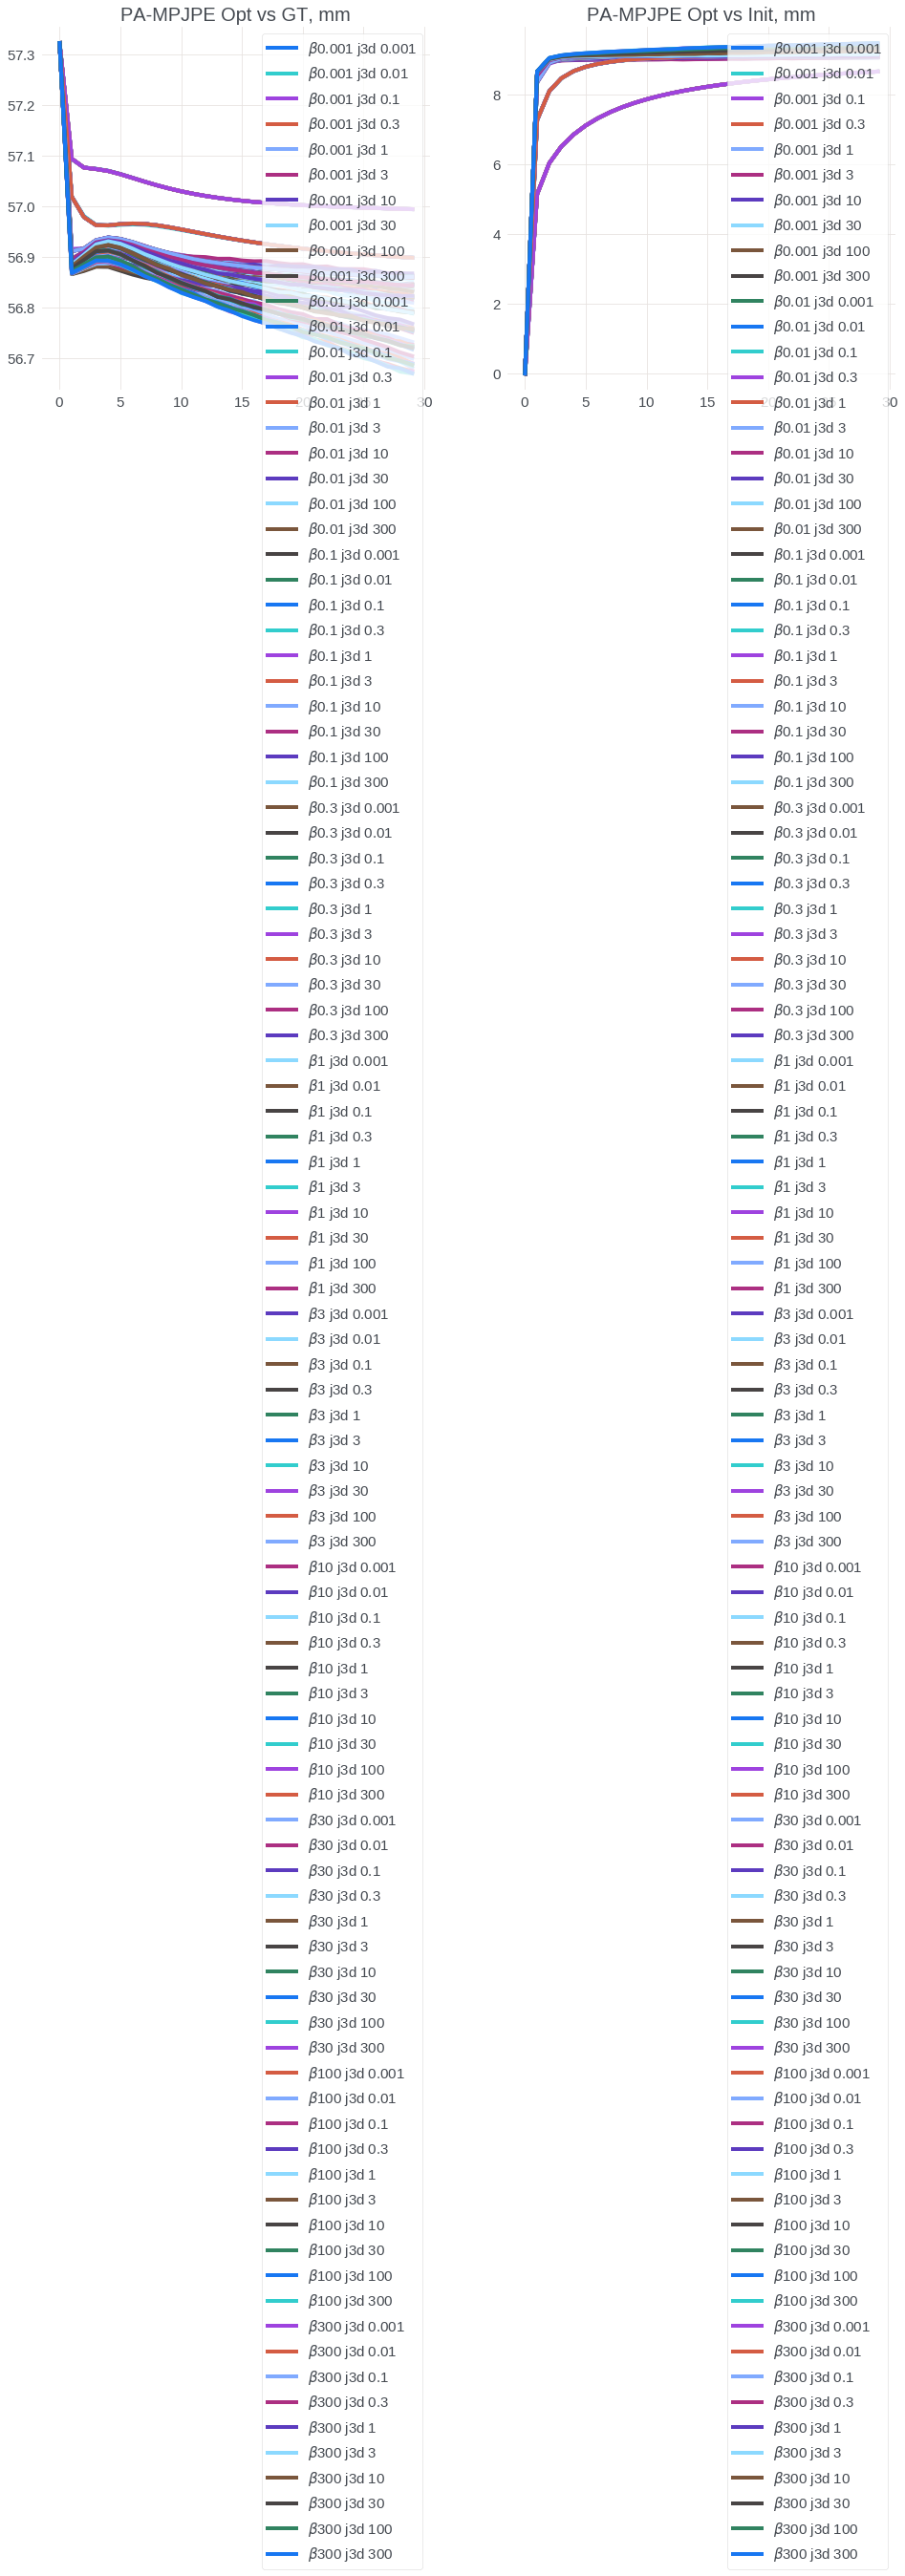

In [19]:
fig = plot_mpjpes(exp_names)

I0901 062804.935 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_01_0_5__j3d_5_0_5__ker30__01_09_2022_05_22_01/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0901 062805.383 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_01_0_5__j3d_5_0_5__ker30__01_09_2022_05_22_01/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_01_0_5__j3d_5_0_5__ker30__01_09_2022_05_22_01/metrics/pa_mpjpe_vs_gt_valid.pth


I0901 062805.387 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_01_0_5__j3d_5_0_5__ker30__01_09_2022_05_22_01/metrics/accel_err_vs_gt_valid.pth ...


I0901 062805.840 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_01_0_5__j3d_5_0_5__ker30__01_09_2022_05_22_01/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_01_0_5__j3d_5_0_5__ker30__01_09_2022_05_22_01/metrics/accel_err_vs_gt_valid.pth


I0901 062805.847 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_1_0_5__j3d_5_0_5__ker30__01_09_2022_04_23_16/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0901 062806.290 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_1_0_5__j3d_5_0_5__ker30__01_09_2022_04_23_16/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_1_0_5__j3d_5_0_5__ker30__01_09_2022_04_23_16/metrics/pa_mpjpe_vs_gt_valid.pth


I0901 062806.294 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_1_0_5__j3d_5_0_5__ker30__01_09_2022_04_23_16/metrics/accel_err_vs_gt_valid.pth ...


I0901 062806.770 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_1_0_5__j3d_5_0_5__ker30__01_09_2022_04_23_16/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_0_1_0_5__j3d_5_0_5__ker30__01_09_2022_04_23_16/metrics/accel_err_vs_gt_valid.pth


I0901 062806.777 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0901 062807.288 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/metrics/pa_mpjpe_vs_gt_valid.pth


I0901 062807.291 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/metrics/accel_err_vs_gt_valid.pth ...


I0901 062807.771 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/metrics/accel_err_vs_gt_valid.pth


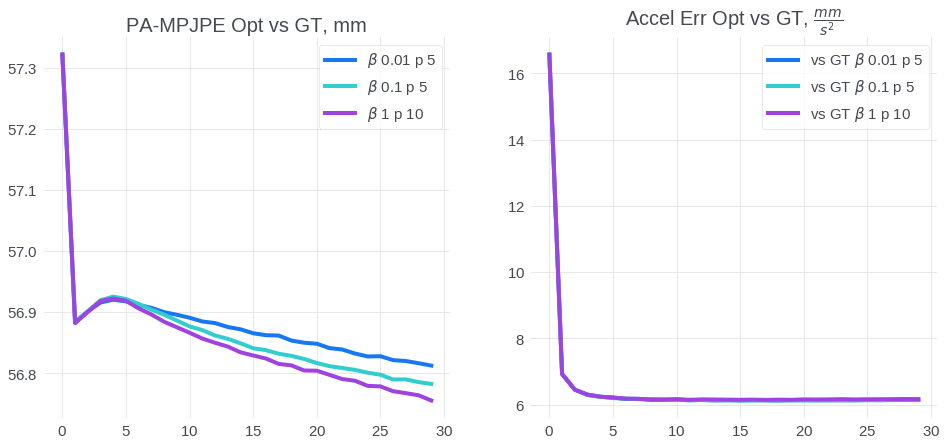

In [204]:
fig = plot_mpjpes_and_accel(ckpt_names)

I0901 062520.464 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_0_1_0_5__ker30__01_09_2022_05_05_42/ckpt.pth ...


I0901 062520.946 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_0_1_0_5__ker30__01_09_2022_05_05_42/ckpt.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_0_1_0_5__ker30__01_09_2022_05_05_42/ckpt.pth


I0901 062520.961 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_1_0_5__ker30__01_09_2022_05_15_41/ckpt.pth ...


I0901 062521.538 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_1_0_5__ker30__01_09_2022_05_15_41/ckpt.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_1_0_5__ker30__01_09_2022_05_15_41/ckpt.pth


I0901 062521.552 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_5_0_5__ker30__01_09_2022_05_31_06/ckpt.pth ...


I0901 062521.807 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_5_0_5__ker30__01_09_2022_05_31_06/ckpt.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_5_0_5__ker30__01_09_2022_05_31_06/ckpt.pth


I0901 062521.824 manifold.py:1445] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/ckpt.pth ...


I0901 062522.376 manifold.py:1499] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/ckpt.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/2022_09_01_seq_optim__coco-all__3dpw_test_seq_339__shape_1_0_5__j3d_10_0_5__ker30__01_09_2022_05_53_21/ckpt.pth


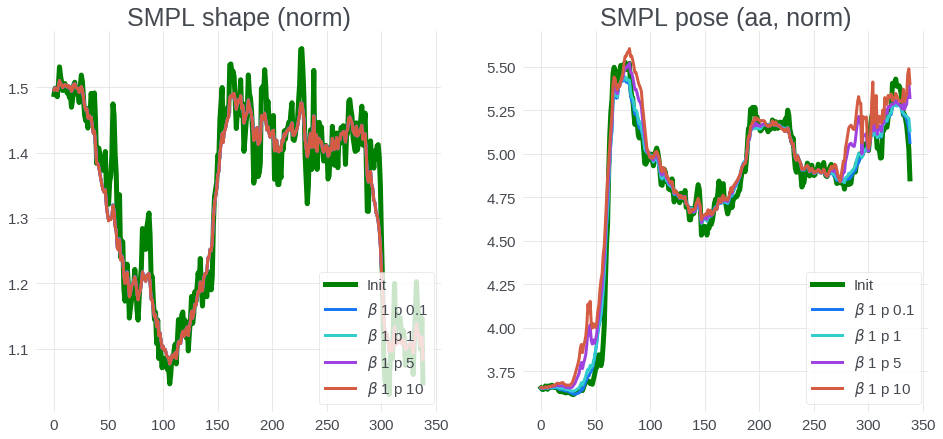

In [201]:
fig = plot_shape_pose_norm(ckpt_names)